In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
features = ['checking account balance', 'duration', 'credit history',
            'purpose', 'amount', 'savings', 'employment', 'installment',
            'marital status', 'other debtors', 'residence time',
            'property', 'age', 'other installments', 'housing', 'credits',
            'job', 'persons', 'phone', 'foreign']
target = 'repaid'
df = pd.read_csv('./data/german.data', sep=' ',
                     names=features+[target])

In [4]:
df.loc[df['repaid'] == 2, 'repaid'] = 0

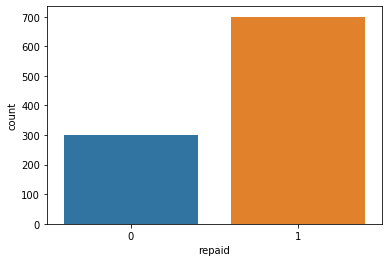

In [5]:
sns.countplot(x = df[target], data = df)

In [6]:
count_no_loan = len(df[df[target]==0])
count_loan = len(df[df[target]==1])
pct_of_no_loan = count_no_loan/(count_no_loan+count_loan)
print("percentage of no subscription is", pct_of_no_loan*100)
pct_of_loan = count_loan/(count_no_loan+count_loan)
print("percentage of subscription", pct_of_loan*100)

percentage of no subscription is 30.0
percentage of subscription 70.0


In [185]:
df.head()

,checking account balance,duration,credit history,purpose,amount,savings,employment,installment,marital status,other debtors,...,property,age,other installments,housing,credits,job,persons,phone,foreign,repaid
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,0
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,0


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking account balance    1000 non-null object
duration                    1000 non-null int64
credit history              1000 non-null object
purpose                     1000 non-null object
amount                      1000 non-null int64
savings                     1000 non-null object
employment                  1000 non-null object
installment                 1000 non-null int64
marital status              1000 non-null object
other debtors               1000 non-null object
residence time              1000 non-null int64
property                    1000 non-null object
age                         1000 non-null int64
other installments          1000 non-null object
housing                     1000 non-null object
credits                     1000 non-null int64
job                         1000 non-null object
persons                     1000 non-null int64
phone              

In [187]:
import matplotlib.pyplot as plt
numerical_features = ['duration', 'age', 'residence time', 'installment', 'amount', 'duration', 'persons', 'credits']
quantitative_features = list(filter(lambda x: x not in numerical_features, features))
X = pd.get_dummies(df, columns=quantitative_features, drop_first=True)
encoded_features = list(filter(lambda x: x != target, X.columns))

In [188]:
X.head()

,duration,amount,installment,residence time,age,credits,persons,repaid,checking account balance_A12,checking account balance_A13,...,property_A124,other installments_A142,other installments_A143,housing_A152,housing_A153,job_A172,job_A173,job_A174,phone_A192,foreign_A202
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


In [189]:
# scale data
norm = 1/X.std()

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
# split in training and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(X*norm, df[target],
            test_size=0.2)

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [242]:
k_range = range(1,100)
scores = {}
scores_list = []
for k in k_range:
    model1 = KNeighborsClassifier(n_neighbors=k)
    model1.fit(X_ros, y_ros)
    ypred1 = model1.predict(Xtest)
    scores[k] = metrics.accuracy_score(ytest, ypred1)
    scores_list.append(metrics.accuracy_score(ytest, ypred1))

In [243]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy score')

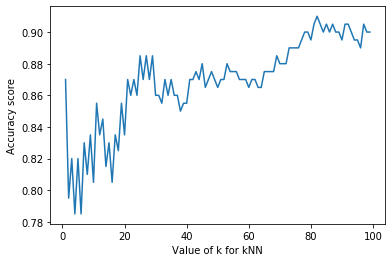

In [244]:
plt.plot(k_range, scores_list)
plt.xlabel('Value of k for kNN')
plt.ylabel('Accuracy score')

In [221]:
type(scores)

dict

In [222]:
def keywithmaxval(d):
     """ a) create a list of the dict's keys and values; 
         b) return the key with the max value"""  
     v=list(d.values())
     k=list(d.keys())
     return k[v.index(max(v))]

In [223]:
kbest = keywithmaxval(scores)
print(kbest)

28


In [224]:
model = KNeighborsClassifier(n_neighbors = kbest).fit(Xtrain, ytrain)

In [225]:
ypred = model.predict(Xtest)
print(ypred)

[0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1
 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1]


In [226]:
print("Accuracy:", metrics.accuracy_score(ytest, ypred))

Accuracy: 0.92


Confusion matrix

An interesting way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. In the first row, the first column indicates how many classes 0 were predicted correctly, and the second column, how many classes 0 were predicted as 1. In the second row, we note that all class 0 entries were predicted as class 1.

Confusion matrix:
 [[ 42  16]
 [  0 142]]


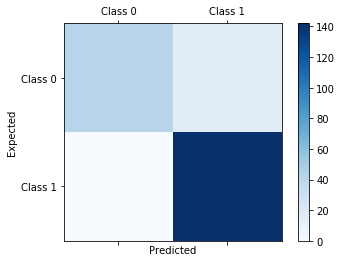

In [227]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=ytest, y_pred=ypred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [229]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(Xtrain, ytrain)

In [230]:
balanced_model = KNeighborsClassifier(n_neighbors = kbest).fit(X_ros, y_ros)

In [231]:
ypred_new = balanced_model.predict(Xtest)
print(ypred_new)

[0 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0
 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0]


In [232]:
print("Accuracy:", metrics.accuracy_score(ytest, ypred_new))

Accuracy: 0.87


In [56]:
model1.score(Xtest, ytest)

0.75

In [234]:
predicted_probability = metrics.accuracy_score(ytest, ypred_new)
print(predicted_probability)

0.87


In [235]:
interest_rate = 0.005

In [236]:
gain = X['amount']*((1 + interest_rate)**(X['duration']) - 1)

In [237]:
expected_utility = ((gain*predicted_probability)-(X['amount']*(1-predicted_probability))).astype(int)
#print(expected_utility)

In [238]:
expected_utility[expected_utility > 0] = 1
expected_utility[expected_utility < 0] = 2
#print(expected_utility)

In [239]:
actions = expected_utility
actions

0      2
1      1
2      2
3      1
4      2
5      1
6      2
7      1
8      2
9      1
10     2
11     1
12     2
13     2
14     2
15     2
16     2
17     1
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     2
26     2
27     2
28     2
29     1
      ..
970    2
971    2
972    2
973    1
974    1
975    2
976    2
977    2
978    2
979    2
980    1
981    1
982    2
983    1
984    2
985    2
986    1
987    2
988    2
989    2
990    2
991    2
992    2
993    1
994    2
995    2
996    1
997    2
998    1
999    1
Length: 1000, dtype: int64

In [240]:
interest_rate = 0.005

In [241]:
n_test_examples = len(Xtest)
utility = 0
    
for t in range(n_test_examples):
        action = actions.iloc[t]
        good_loan = ytest.iloc[t] # assume the labels are correct
        duration = Xtest['duration'].iloc[t]
        amount = Xtest['amount'].iloc[t]
        # If we don't grant the loan then nothing happens
        if (action==1):
            if (good_loan != 1):
                utility -= amount
            else:    
                utility += amount*(pow(1 + interest_rate, duration) - 1)
                
utility

-7.841012360597625

In [169]:
from sklearn import svm

In [195]:
svm_model = svm.SVC(kernel='linear')

In [196]:
svm_model.fit(Xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [197]:
ypred_svm = svm_model.predict(Xtest)

In [198]:
print("Accuracy:", metrics.accuracy_score(ytest, ypred_svm))

Accuracy: 1.0


In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [210]:
logreg = LogisticRegression(solver='lbfgs', multi_class='multinomial')
logreg.fit(os_data_X, os_data_y)

/Users/jolyndevis/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
predictions = logreg.predict(Xtest)
predicted_prob = logreg.predict_proba(Xtest)

In [212]:
logreg.score(Xtest, ytest)

1.0

In [213]:
print(classification_report(ytest,predictions))
print("Accuracy:",metrics.accuracy_score(ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00       142

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy: 1.0
